# LSTM Mini Project

## Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import LSTM, GRU
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import MinMaxScaler

## Dataset

In [9]:
stock_data = pd.read_csv('../../DataSets/prices.csv')

stock_data.head(2)
stock_data.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [10]:
stock_data['date'].min(), stock_data['date'].max(), stock_data.symbol.nunique()

stock_data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [12]:
len(stock_data.close.values)

subset_stock=stock_data.loc[(stock_data['symbol']=='MSFT'), 'close'].values.astype('float32')

closing_price = subset_stock.reshape(-1,1)

## Data Pre-processing

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
norm_close_prices = scaler.fit_transform(closing_price)

train_val = int(len(norm_close_prices)*0.75)
test_val = len(norm_close_prices)-train_val
train_set = closing_price[0:train_val]
test_set = closing_price[train_val:]

def time_lag_generator(inputdata, features):
    X, Y = [], []
    for val in range(len(inputdata)-features-1):
        a = inputdata[val: (val+features),0]
        X.append(a)
        Y.append(inputdata[val+features,0])
    return np.array(X), np.array(Y)

features = 2
train_features, train_label = time_lag_generator(train_set, 2)
test_features, test_label = time_lag_generator(test_set, 2)
len(test_features), test_features.shape, len(test_label), test_label.shape

(438, (438, 2), 438, (438,))

## Model

In [21]:
train_features = train_features.reshape(train_features.shape[0],1,train_features.shape[1])
train_features.shape

test_features = test_features.reshape(test_features.shape[0],1,test_features.shape[1])
test_features.shape

(438, 1, 2)

In [24]:
model = Sequential()
model.add(GRU(256, input_shape=(1,features), return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(256))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 256)            199680    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 741,505
Trainable params: 741,505
Non-trainable params: 0
________________________________________________

In [25]:
model.compile(loss="mean_squared_error", optimizer=Adam(0.0005), metrics=['mean_squared_error'])
results = model.fit(train_features, train_label, epochs=70, batch_size=128, validation_data=(test_features, test_label))

Epoch 1/70
11/11 [==============================] - 1s 67ms/step - loss: 1007.1160 - mean_squared_error: 1007.1160 - val_loss: 2369.7117 - val_mean_squared_error: 2369.7117
Epoch 2/70
11/11 [==============================] - 0s 11ms/step - loss: 736.5596 - mean_squared_error: 736.5596 - val_loss: 1724.5099 - val_mean_squared_error: 1724.5099
Epoch 3/70
11/11 [==============================] - 0s 11ms/step - loss: 368.2510 - mean_squared_error: 368.2510 - val_loss: 991.9435 - val_mean_squared_error: 991.9435
Epoch 4/70
11/11 [==============================] - 0s 11ms/step - loss: 105.0223 - mean_squared_error: 105.0223 - val_loss: 471.0670 - val_mean_squared_error: 471.0670
Epoch 5/70
11/11 [==============================] - 0s 11ms/step - loss: 46.8920 - mean_squared_error: 46.8920 - val_loss: 295.5989 - val_mean_squared_error: 295.5989
Epoch 6/70
11/11 [==============================] - 0s 12ms/step - loss: 52.6451 - mean_squared_error: 52.6451 - val_loss: 340.7141 - val_mean_squared_

11/11 [==============================] - 0s 11ms/step - loss: 2.8805 - mean_squared_error: 2.8805 - val_loss: 24.1417 - val_mean_squared_error: 24.1417
Epoch 51/70
11/11 [==============================] - 0s 10ms/step - loss: 3.1800 - mean_squared_error: 3.1800 - val_loss: 24.0538 - val_mean_squared_error: 24.0538
Epoch 52/70
11/11 [==============================] - 0s 10ms/step - loss: 2.7963 - mean_squared_error: 2.7963 - val_loss: 22.8983 - val_mean_squared_error: 22.8983
Epoch 53/70
11/11 [==============================] - 0s 10ms/step - loss: 2.9698 - mean_squared_error: 2.9698 - val_loss: 23.0110 - val_mean_squared_error: 23.0110
Epoch 54/70
11/11 [==============================] - 0s 10ms/step - loss: 2.9108 - mean_squared_error: 2.9108 - val_loss: 22.4467 - val_mean_squared_error: 22.4467
Epoch 55/70
11/11 [==============================] - 0s 11ms/step - loss: 2.8445 - mean_squared_error: 2.8445 - val_loss: 21.1447 - val_mean_squared_error: 21.1447
Epoch 56/70
11/11 [=========

## Results

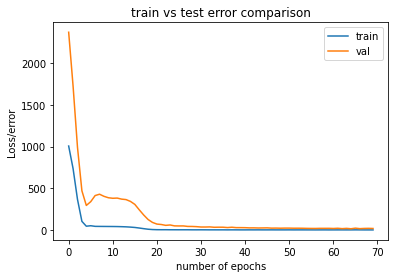

In [26]:
plt.plot(results.history['mean_squared_error'])
plt.plot(results.history['val_mean_squared_error'])
plt.title('train vs test error comparison')
plt.xlabel('number of epochs')
plt.ylabel('Loss/error')
plt.legend(['train','val'])